In [35]:
#Importing Dependcies

import spotipy
import time
from IPython.core.display import clear_output
from spotipy import SpotifyClientCredentials, util
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter("ignore")
from flask import request

#Libraries to create the multiclass model
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

#Import tensorflow and disable the v2 behavior and eager mode
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
tf.compat.v1.disable_v2_behavior()

#Library to validate the model
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score

#connection to credentials
from credentials import*

In [36]:
# Creating csv path and loading second data in Pandas DataFrame

csv_path = ("data/data_moods.csv")
dataMood_df = pd.read_csv(csv_path)
dataMood_df.head()

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,1999,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,1982-10-27,68,379266,0.866,0.13700,0.730,0.000000,0.0843,0.625,-8.201,0.0767,118.523,5,4,Happy
1,23,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,2007-04-16,43,318800,0.381,0.01890,0.832,0.196000,0.1530,0.166,-5.069,0.0492,120.255,8,4,Sad
2,9 Crimes,9,Damien Rice,5GZEeowhvSieFDiR8fQ2im,2006-11-06,60,217946,0.346,0.91300,0.139,0.000077,0.0934,0.116,-15.326,0.0321,136.168,0,4,Sad
3,99 Luftballons,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,1984-08-21,2,233000,0.466,0.08900,0.438,0.000006,0.1130,0.587,-12.858,0.0608,193.100,4,4,Happy
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,47IWLfIKOKhFnz1FUEUIkE,2004-01-01,60,268000,0.419,0.00171,0.932,0.000000,0.1370,0.445,-3.604,0.1060,169.881,1,4,Energetic


In [37]:
# Choosing the features for our analysis

chosen_cols = ['danceability', 'energy', 'loudness', 'speechiness', 
                         'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

data_df = dataMood_df[chosen_cols].copy()

data_df.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.866,0.730,-8.201,0.0767,0.13700,0.000000,0.0843,0.625,118.523
1,0.381,0.832,-5.069,0.0492,0.01890,0.196000,0.1530,0.166,120.255
2,0.346,0.139,-15.326,0.0321,0.91300,0.000077,0.0934,0.116,136.168
3,0.466,0.438,-12.858,0.0608,0.08900,0.000006,0.1130,0.587,193.100
4,0.419,0.932,-3.604,0.1060,0.00171,0.000000,0.1370,0.445,169.881


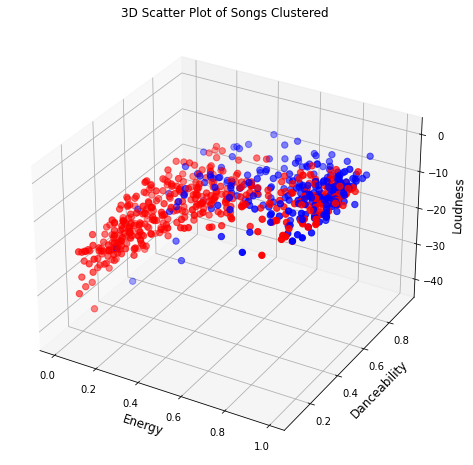

In [38]:
# Comparing the Attributes

col_features = data_df.columns[6:]
X = MinMaxScaler().fit_transform(data_df[col_features])
kmeans = KMeans(init = "k-means++",n_clusters = 2,random_state = 15).fit(X)
data_df['kmeans'] = kmeans.labels_
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection='3d')

x = data_df['energy']
y = data_df['danceability']
z = data_df['loudness']
cmhot = cmhot = plt.get_cmap('bwr')

ax.scatter(x,y,z, c = data_df['kmeans'],s = 40,cmap = cmhot)
ax.set_xlabel('Energy',fontsize=12)
ax.set_ylabel('Danceability',fontsize=12)
ax.set_zlabel('Loudness',fontsize=12)
ax.set_title("3D Scatter Plot of Songs Clustered")

plt.savefig("image/3D_scatter")

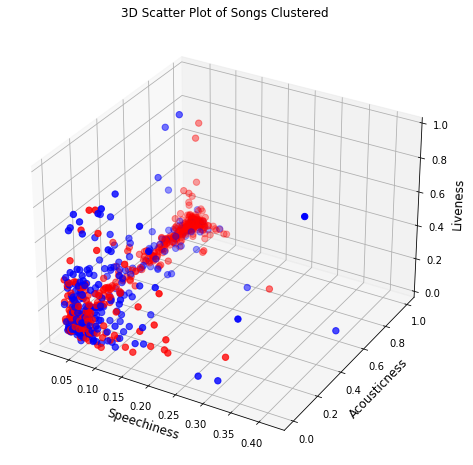

In [39]:
# Comparing the Attributes

col_features = data_df.columns[6:]
X = MinMaxScaler().fit_transform(data_df[col_features])
kmeans = KMeans(init="k-means++",n_clusters=2,random_state=15).fit(X)
data_df['kmeans'] = kmeans.labels_
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection='3d')

x = data_df['speechiness']
y = data_df['acousticness']
z = data_df['liveness']
cmhot = cmhot = plt.get_cmap('bwr')

ax.scatter(x,y,z, c = data_df['kmeans'],s = 40,cmap=cmhot)
ax.set_xlabel('Speechiness',fontsize=12)
ax.set_ylabel('Acousticness',fontsize=12)
ax.set_zlabel('Liveness',fontsize=12)
ax.set_title("3D Scatter Plot of Songs Clustered")

plt.savefig("image/3D_scatter2")

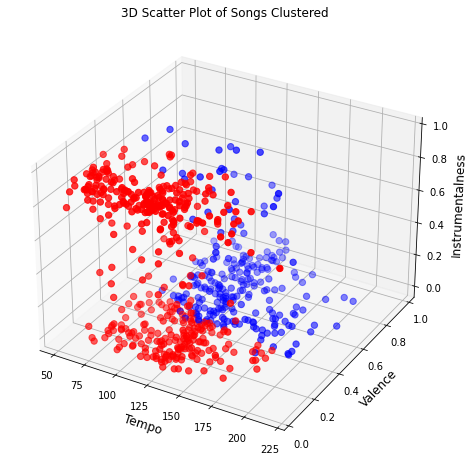

In [40]:
# Comparing the Attributes

col_features = data_df.columns[6:]
X = MinMaxScaler().fit_transform(data_df[col_features])
kmeans = KMeans(init="k-means++",n_clusters=2,random_state=15).fit(X)
data_df['kmeans'] = kmeans.labels_
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection='3d')

x = data_df['tempo']
y = data_df['valence']
z = data_df['instrumentalness']
cmhot = cmhot = plt.get_cmap('bwr')

ax.scatter(x,y,z, c = data_df['kmeans'],s = 40,cmap=cmhot)
ax.set_xlabel('Tempo',fontsize=12)
ax.set_ylabel('Valence',fontsize=12)
ax.set_zlabel('Instrumentalness',fontsize=12)
ax.set_title("3D Scatter Plot of Songs Clustered")

plt.savefig("image/3D_scatter3")

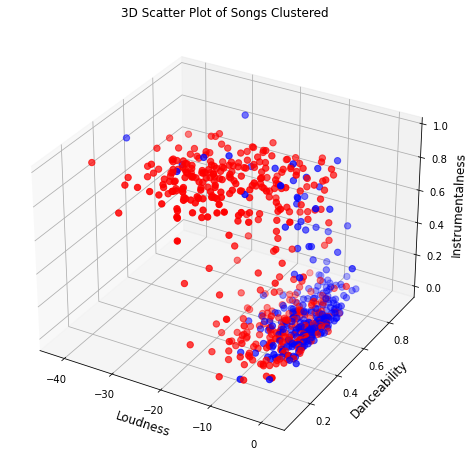

In [41]:
# Comparing the Attributes

col_features = data_df.columns[6:]
X = MinMaxScaler().fit_transform(data_df[col_features])
kmeans = KMeans(init="k-means++",n_clusters=2,random_state=15).fit(X)
data_df['kmeans'] = kmeans.labels_
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection='3d')

x = data_df['loudness']
y = data_df['danceability']
z = data_df['instrumentalness']
cmhot = cmhot = plt.get_cmap('bwr')

ax.scatter(x,y,z, c=data_df['kmeans'],s=40,cmap=cmhot)
ax.set_xlabel('Loudness',fontsize=12)
ax.set_ylabel('Danceability',fontsize=12)
ax.set_zlabel('Instrumentalness',fontsize=12)
ax.set_title("3D Scatter Plot of Songs Clustered")

plt.savefig("image/3D_scatter4")

# Building the model

### Pre-processing the data

In [42]:
# Normalizing the features using MinMaxScaler to scale our values between a range of [0,1]
# we manage to preserve the shape of the original dataset

features = dataMood_df.columns[6:-3]
X= MinMaxScaler().fit_transform(dataMood_df[features])
X2 = np.array(dataMood_df[features])
Y = dataMood_df['mood']

<AxesSubplot:xlabel='mood', ylabel='count'>

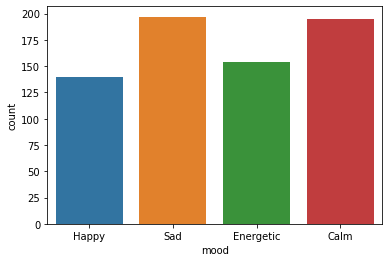

In [43]:
# Visualize number of data point for each class

sns.countplot(dataMood_df['mood'])

In [44]:
#Encodethe categories
#encoding the 4 categories remembering that the neural network uses numerical values in the tarining and testing processes

encoder = LabelEncoder()
encoder.fit(Y)
encoded_y = encoder.transform(Y)


#Convert to  dummy (Not necessary in my case)
dummy_y = np_utils.to_categorical(encoded_y)

# Splitting  the data by 80% for training and 20% for testing

X_train,X_test,Y_train,Y_test = train_test_split(X,encoded_y,test_size=0.2,random_state=15)

encoded_cat = pd.DataFrame({'mood':dataMood_df['mood'].tolist(),'encode_val':encoded_y}).drop_duplicates().sort_values(['encode_val'],ascending=True)
encoded_cat

,mood,encode_val
5,Calm,0
4,Energetic,1
0,Happy,2
1,Sad,3


# Create a logistic regression model

In [45]:

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [46]:
#Fitting (train) our model by using the training data

classifier.fit(X_train, Y_train)

LogisticRegression()

In [47]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression()

In [48]:
# Validate the model by using the test data
print(f"Training Data Score: {classifier.score(X_train, Y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, Y_test)}")

Training Data Score: 0.8156934306569343
Testing Data Score: 0.8043478260869565


In [49]:
y_true = Y_test
y_pred = classifier.predict(X_test)
confusion_matrix(y_true, y_pred)

array([[36,  0,  0,  2],
       [ 0, 29,  1,  1],
       [ 1,  9, 16,  2],
       [ 6,  1,  4, 30]])

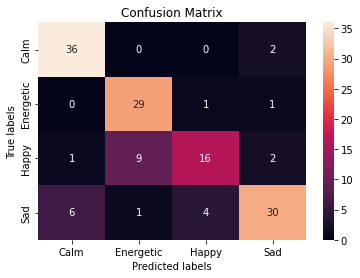

Accuracy Score 0.8043478260869565


In [50]:
confx = confusion_matrix(y_true,y_pred)
ax = plt.subplot()
sns.heatmap(confx,annot=True,ax=ax)

labels =encoded_cat['mood']
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

#plt.savefig("image/Confusion_Matrix")

print("Accuracy Score",accuracy_score(y_true,y_pred))

# Create a random forest model

In [51]:
# Train a Random Forest Classifier model and print the model score
from sklearn.ensemble import RandomForestClassifier

In [52]:
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
# Train a Random Forest Classifier model and print the model score
clf = RandomForestClassifier(random_state=1, n_estimators=45).fit(X_train_scaled, Y_train)
print(f'Training Score: {clf.score(X_train_scaled, Y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, Y_test)}')

Training Score: 1.0
Testing Score: 0.8405797101449275


[0.03935379 0.05057181 0.13970016 0.15839602 0.18889009 0.03578732
 0.07907307 0.21385643 0.05930966 0.03506166]


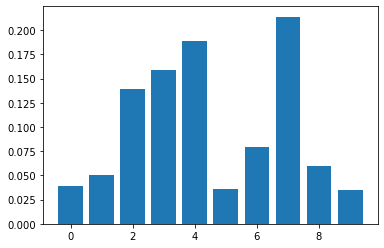

In [54]:
features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

In [55]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, Y_train)
sel.get_support()

array([False, False,  True,  True,  True, False, False,  True, False,
       False])

In [71]:
 #Create the model

def base_model():
   
    nn_model = Sequential()
    
    #First hidden layer with 8 nodes,input of 4 dim with relu function
    nn_model.add(Dense(units=8,input_dim=10,activation='relu'))
    
    #Second hidden layer with output 3 and softmax function
    nn_model.add(Dense(units=4,activation='softmax'))
    
    #Compile the model using sigmoid loss function and adam optim
    nn_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    
    return nn_model

In [72]:
CNN_Model = base_model()

CNN_Model.summary()

CNN_Model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential_68"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_136 (Dense)           (None, 8)                 88        
                                                                 
 dense_137 (Dense)           (None, 4)                 36        
                                                                 
Total params: 124
Trainable params: 124
Non-trainable params: 0
_________________________________________________________________


In [73]:
#Configure the model
estimator = KerasClassifier(build_fn=base_model,epochs=300,verbose=0)

In [74]:
#Evaluate the model using KFold cross validation
# Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample
#commonly used in applied ML to compare and select a model for a given predictive modeling problem because it is easy to understand
#easy to implement and results in skills estimates that generally have a lower bias than others methods

kfold = KFold(n_splits=10,shuffle=True)
results = cross_val_score(estimator,X,encoded_y,cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100,results.std()*100))

2022-11-09 16:12:20.510607: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-09 16:12:20.595637: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled


Baseline: 80.62% (3.92%)


In [75]:
#Training the model with the train data which represents the 80% of the main data
estimator.fit(X_train,Y_train)

# using the test data to predict the model
y_pred = estimator.predict(X_test)

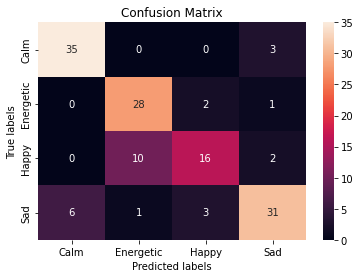

Accuracy Score 0.7971014492753623


<Figure size 432x288 with 0 Axes>

In [76]:
# plotting a confusion matrix to evaluate the accuracy of the model
confx = confusion_matrix(Y_test,y_pred)
ax = plt.subplot()
sns.heatmap(confx,annot=True,ax=ax)

labels =encoded_cat['mood']
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

plt.savefig("image/Confusion_Matrix")

print("Accuracy Score",accuracy_score(Y_test,y_pred))


In [77]:
#credentials field

client_id = "Your Client ID"
client_secret = "Your Secret ID"

In [78]:
#Credentials to access the Spotify Music Data

manager = SpotifyClientCredentials(client_id,client_secret)
sp = spotipy.Spotify(client_credentials_manager=manager)

In [79]:
def access_features(ids):

    metaData = sp.track(ids)
    features = sp.audio_features(ids)

    # meta
    name = metaData['name']
    album = metaData['album']['name']
    artist = metaData['album']['artists'][0]['name']
    release_date = metaData['album']['release_date']
    length = metaData['duration_ms']
    popularity = metaData['popularity']
    ids =  metaData['id']

    # features
    acousticness = features[0]['acousticness']
    danceability = features[0]['danceability']
    energy = features[0]['energy']
    instrumentalness = features[0]['instrumentalness']
    liveness = features[0]['liveness']
    valence = features[0]['valence']
    loudness = features[0]['loudness']
    speechiness = features[0]['speechiness']
    tempo = features[0]['tempo']
    key = features[0]['key']
    time_signature = features[0]['time_signature']

    song = [name, album, artist, ids, release_date, popularity, length, danceability, acousticness,
            energy, instrumentalness, liveness, valence, loudness, speechiness, tempo, key, time_signature]
    columns = ['name','album','artist','id','release_date','popularity','length','danceability','acousticness','energy','instrumentalness',
                'liveness','valence','loudness','speechiness','tempo','key','time_signature']
    return song,columns

In [82]:
#Joining the model and the MinMaxscaler in a Pipeline
# The batch size defines the number of samples that will be propagated through the network
    

def predict_track_info(id_song):
    
    pip = Pipeline([('minmaxscaler',MinMaxScaler()),('keras',KerasClassifier(build_fn=base_model,epochs=300,batch_size=200,verbose=0))])
    
    #Fitting the Pipeline
    pip.fit(X2,encoded_y)

    #Obtaining the features of the song
    
    pred = access_features(id_song)
    
    #Pre-processing the features to input the Model
    
    pred_features = np.array(pred[0][6:-2]).reshape(-1,1).T

    #Predicting the features of the song
    results = pip.predict(pred_features)

    mood = np.array(encoded_cat['mood'][encoded_cat['encode_val']==int(results)])
    name_song = pred[0][0]
    artist = pred[0][2]

    return print("{0} by {1}, and the predicted mood is {2}".format(name_song,artist,mood[0].upper()))
    

In [83]:
predict_track_info('2Vc6NJ9PW9gD9q343XFRKx')

Mercury: Retrograde by Ghostemane, and the predicted mood is ENERGETIC
